In [1]:
import numpy as np
from scipy import fft, signal
import matplotlib.pyplot as plt

In [2]:
f1 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_10_vol_20.csv','r')
f2 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_20_vol_20.csv','r')
f3 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_30_vol_20.csv','r')
f4 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_40_vol_20.csv','r')
f5 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_50_vol_20.csv','r')
f6 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_60_vol_20.csv','r')
f7 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_70_vol_20.csv','r')
f8 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_80_vol_20.csv','r')
f9 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_90_vol_20.csv','r')
f10 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_100_vol_20.csv','r')
f11 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_110_vol_20.csv','r')
f12 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_120_vol_20.csv','r')
f13 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_130_vol_20.csv','r')
f14 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_140_vol_20.csv','r')
f15 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_150_vol_20.csv','r')
f16 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_160_vol_20.csv','r')
f17 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_170_vol_20.csv','r')
f18 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_180_vol_20.csv','r')
f19 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_190_vol_20.csv','r')
f20 = open('/home/eli/Documents/Shaker_project_V2/shaker_v2/shaker_rig_code/data/freq_200_vol_20.csv','r')

f_list = [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20]


In [3]:
data_arr = np.zeros((20,5,100000))
i=0
dT_list = []
for file in f_list:
    j=0
    total_time = 0
    for line in file:
        line_list = line.strip('[]\n ').split(',',3)
        dT =  float(line_list[3].strip('.')) * 0.000001 # time is reported in microseconds
        dT_list.append(dT)
        total_time += dT
        data_arr[i][0][j] = total_time
        data_arr[i][1][j] = line_list[0].strip('.')   
        data_arr[i][2][j] = line_list[1].strip('.')   
        data_arr[i][3][j] = line_list[2].strip('.')   
        data_arr[i][4][j] = dT*1000000

        j+=1
    i+=1

In [4]:
for file in f_list:
    file.close()

In [5]:
plot_range = (10000,90000) # don't use beginning or end of dataset. DAQ seems to have an issue with early times
plot_data_arr = np.zeros((20,5,plot_range[1]-plot_range[0]))
for i in range(len(f_list)):
    for j in range(4):
        for k in range(plot_range[0], plot_range[1]):
            plot_data_arr[i][j][k-plot_range[0]] = data_arr[i][j][k]

print (plot_data_arr.shape)

(20, 5, 80000)


In [24]:
###  dataset index number selected in pot_data_arr[i][3]. second index is component of acceleration

dataset_number = 6
input_signal = plot_data_arr[dataset_number][3]
sample_times = plot_data_arr[dataset_number][0]
sample_dTs = plot_data_arr[dataset_number][1]

In [25]:
freq = (dataset_number+1) * 10
sample_rate = 6666
sample_period = 150 * 0.000001 # 150 microseconds is sample period
num_samples_period = (1/freq) * sample_rate
nyquist_freq = sample_rate / 2
Wn = freq * 5/ nyquist_freq
print(Wn)

b,a = signal.butter(3,Wn, 'lowpass')
output_signal = signal.filtfilt(b,a,input_signal)
print(freq)

0.10501050105010501
70


0.000842
0.030522999999999998


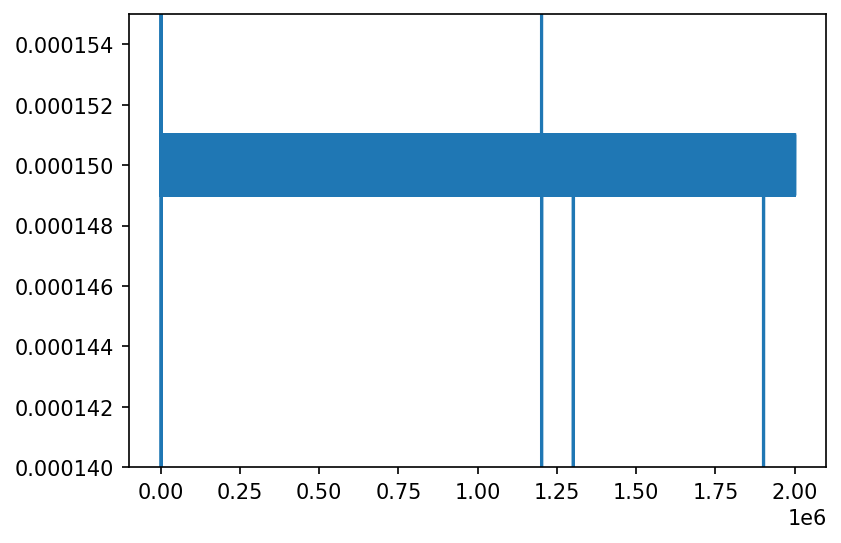

In [26]:
plt.plot(dT_list)
plt.ylim(0.00014,0.000155) 
bad_dT_list=[]
for t in dT_list:
    if t > 0.000152 or t < 0.000148:
        bad_dT_list.append(t)
print(len(bad_dT_list) / len(dT_list))
print(max(bad_dT_list))

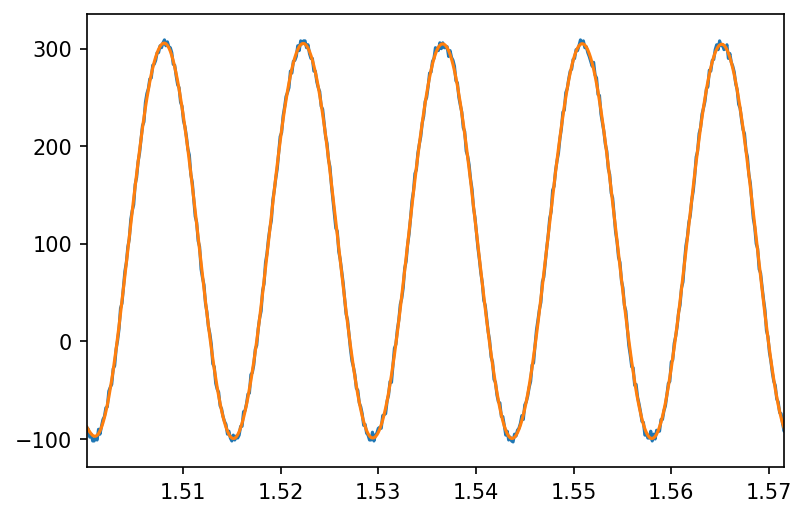

In [37]:
plt.plot(sample_times, input_signal)
plt.plot(sample_times, output_signal)

expected_signal1 = np.zeros(len(input_signal))
expected_signal2 = np.zeros(len(input_signal))

phi = .35
for i in range(len(expected_signal1)):
    t = sample_times[i]
    expected_signal1[i] = np.sin(2*np.pi*t*freq + phi*2*np.pi) * 200 + 100
    expected_signal2[i] = np.sin(2*np.pi*t*freq) * 200 + 100

#plt.plot(sample_times, expected_signal1)
#plt.plot(sample_times, expected_signal2, linestyle = ':')

plt.xlim(sample_times[0], sample_times[0]+(1/freq)*5)

plt.rcParams['figure.dpi'] = 150
plt.show()

(0.0, 1000.0)

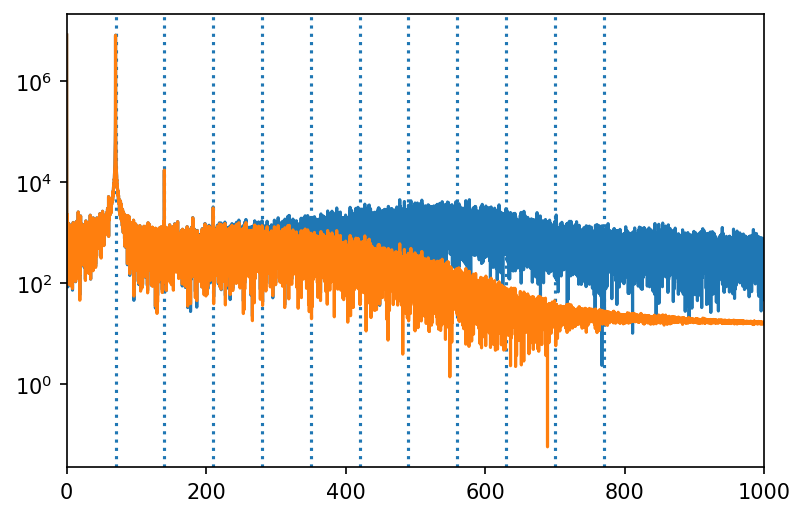

In [28]:
input_fft = fft.rfft(input_signal)
output_fft = fft.rfft(output_signal)
fft_freqs = fft.rfftfreq(plot_range[1]-plot_range[0],d=sample_period)
for i in range(1,12):
    plt.axvline(freq*i, linestyle=':')
plt.plot(fft_freqs, abs(input_fft))
plt.plot(fft_freqs, abs(output_fft))
plt.yscale('log')
plt.xlim(0,1000)

(1900.0, 2500.0)

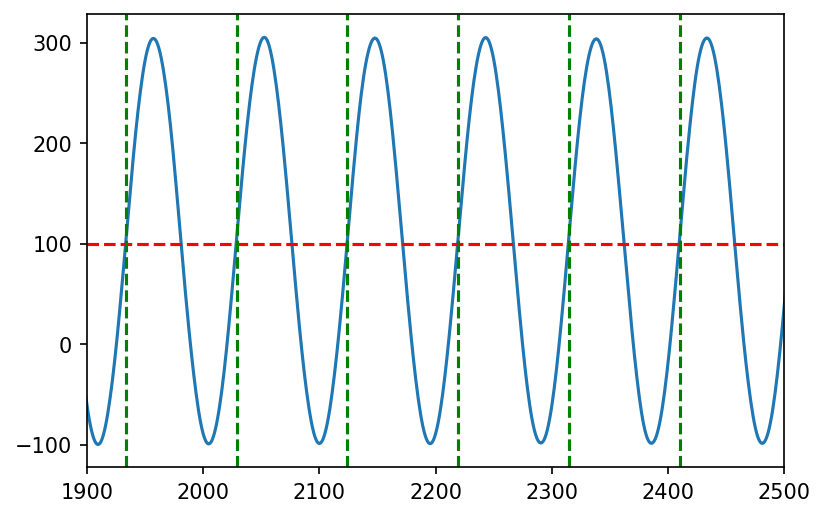

In [29]:
threshold = 100
eval_arr = output_signal
trigger_arr = []
for i in range(1, len(eval_arr)):
    prev_y = eval_arr[i-1]
    curr_y = eval_arr[i]
    if prev_y < threshold and curr_y > threshold:
        trigger_arr.append(i)
#print(trigger_arr)
plt.plot(eval_arr)
plt.axhline(threshold, linestyle='--', color = 'r')
for x_val in trigger_arr:
    plt.axvline(x_val,linestyle='--', color = 'g')
plt.xlim(1900,2500)

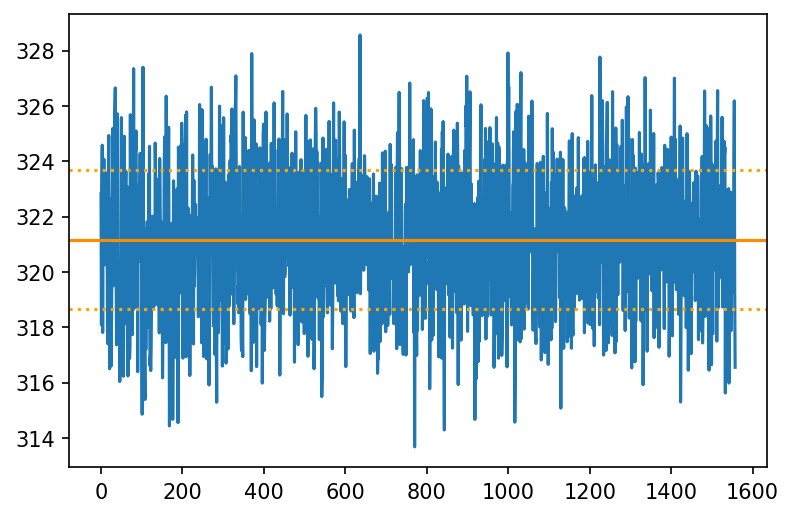

In [13]:
pkpk_list = []
for i in range(2,len(trigger_arr)-1):
    period = output_signal[trigger_arr[i-1] : trigger_arr[i]]
    min_ = np.min(period)
    max_ = np.max(period)
    pkpk_list.append(max_-min_)
plt.plot(pkpk_list)

avg = np.mean(pkpk_list)
std = np.std(pkpk_list)

plt.axhline(avg, color='darkorange')
plt.axhline(avg + std, color='orange', linestyle=':')
plt.axhline(avg - std, color='orange', linestyle=':')


#plt.ylim(0,400)
plt.rcParams['figure.dpi'] = 100
plt.show()